In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/archive (3)/data.csv")
print(data.head)
print(data.describe)

<bound method NDFrame.head of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  con

In [ ]:
data.isnull().sum().sum()


0

In [ ]:
y=data["price"]

In [ ]:
df=data
col=["price","date","street","city","statezip","country"]
x=df.drop(col,axis=1)
x.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,shuffle=True)
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
2877,3.0,2.25,1820,7326,2.0,0,0,3,1820,0,1983,2009
1068,5.0,2.00,1930,6120,1.5,0,0,3,1930,0,1941,1969
4112,3.0,1.75,1140,10400,1.0,0,0,4,1140,0,1983,0
2340,4.0,2.50,3280,6181,2.0,0,0,3,3280,0,2001,0
3843,3.0,2.25,1320,1800,2.0,0,0,3,1320,0,1994,0


In [ ]:
x_train.shape

(3450, 12)

In [ ]:
y_train=y_train/max(y_train)
y_test=y_test/max(y_test)

In [ ]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
model=Sequential()
model.add(Dense(12,activation="relu",input_shape=(12,)))
model.add(Dense(30,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [ ]:
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2,shuffle=True)


Epoch 1/100
87/87 [==============================] - 4s 12ms/step - loss: 0.0518 - mae: 0.1561 - val_loss: 8.0484e-04 - val_mae: 0.0186
Epoch 2/100
87/87 [==============================] - 1s 6ms/step - loss: 0.0010 - mae: 0.0175 - val_loss: 5.6512e-04 - val_mae: 0.0168
Epoch 3/100
87/87 [==============================] - 1s 6ms/step - loss: 9.6058e-04 - mae: 0.0171 - val_loss: 5.1245e-04 - val_mae: 0.0165
Epoch 4/100
87/87 [==============================] - 0s 3ms/step - loss: 9.4315e-04 - mae: 0.0170 - val_loss: 4.8922e-04 - val_mae: 0.0163
Epoch 5/100
87/87 [==============================] - 0s 3ms/step - loss: 9.3105e-04 - mae: 0.0168 - val_loss: 4.7436e-04 - val_mae: 0.0160
Epoch 6/100
87/87 [==============================] - 0s 3ms/step - loss: 9.1712e-04 - mae: 0.0165 - val_loss: 4.5322e-04 - val_mae: 0.0156
Epoch 7/100
87/87 [==============================] - 0s 3ms/step - loss: 9.0114e-04 - mae: 0.0160 - val_loss: 4.3230e-04 - val_mae: 0.0151
Epoch 8/100
87/87 [===============

In [ ]:
model.evaluate(x_train,y_train)

108/108 [==============================] - 0s 2ms/step - loss: 2.5523e-04 - mae: 0.0068


[0.0002552312798798084, 0.0067764269188046455]

In [ ]:
y_pred=model.predict(x_test)
y_pred

36/36 [==============================] - 0s 1ms/step


array([[0.02463606],
       [0.02400423],
       [0.01067428],
       ...,
       [0.02732979],
       [0.01407561],
       [0.04656944]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.05686128522768476


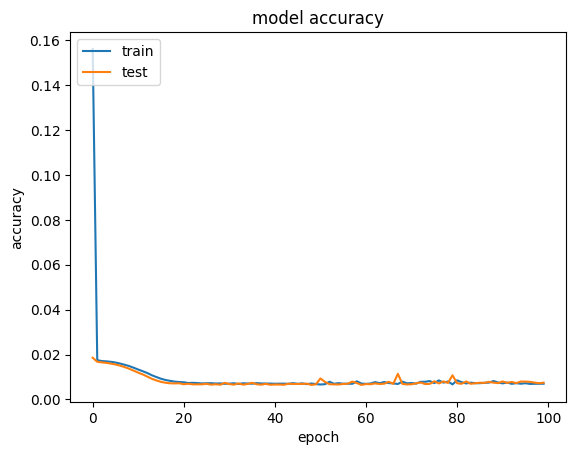

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

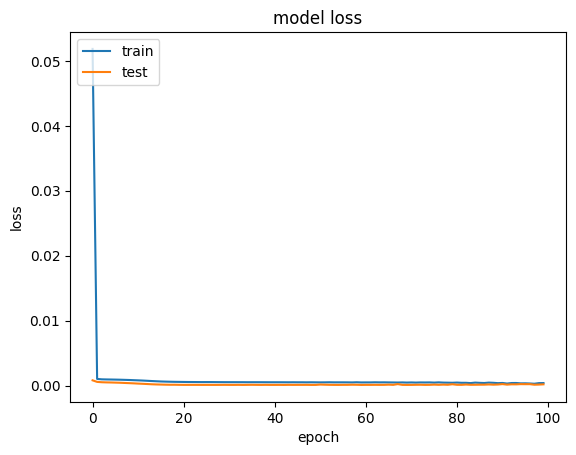

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()